In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

import calendar

#### Load daily zonal winds stress

In [2]:
file='/home/rmantrip/CLIM680/clim680_dataset/tropflux/taux_tropflux_1979.2017.nc'
ds=xr.open_dataset(file)
taux = ds.taux

#### Calculate zonal winds stress monthly climatology

In [3]:
taux_clim = taux.groupby('time.month').mean()

In [4]:
### Add month names to the month dimension

taux_clim['month'] = calendar.month_name[1:]

Text(0.5, 0.98, 'Monthly Climatological Zonal Wind Stress (TropFlux)')

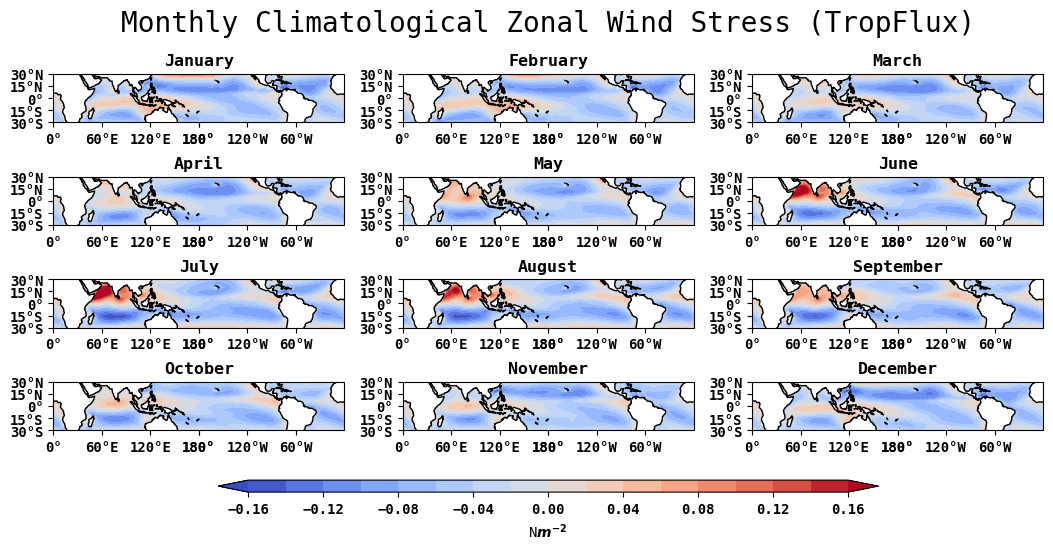

In [6]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
                        figsize=(11,6))

plt.rc({'titleweight':'bold'})

font = {'family' : 'monospace',
        'weight' : 'bold'}

plt.rc('font', **font)  

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

clevs=np.arange(-0.16,0.18,0.02)

#Loop over all of the months and plot
for i,seas in enumerate(taux_clim['month']):

        # Select the month
        data=taux_clim.sel(month=seas)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=taux_clim['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,taux_clim['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-30,31,15), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the month
        axs[i].set_title(seas.values,fontweight='bold')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='N$m^{-2}$')

# Add a big title at the top
plt.suptitle('Monthly Climatological Zonal Wind Stress (TropFlux)',fontsize=20)